In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [2]:
import zipfile,os
local_zip = '/tmp/model-hololive-en.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
train_dir = '/tmp/model-hololive-en/train'
validation_dir = '/tmp/model-hololive-en/test'

In [4]:
train_datagen = ImageDataGenerator(
                    validation_split=0.2,
                    rescale=1./255)
 
test_datagen = ImageDataGenerator(
                    validation_split=0.2,
                    rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='categorical',
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    shuffle=True)

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         class_mode='categorical',
                                                         target_size=(150, 150),
                                                         batch_size=32,
                                                         shuffle=True)

Found 430 images belonging to 5 classes.
Found 170 images belonging to 5 classes.


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['categorical_accuracy'])

In [32]:
filepath = "/tmp/model-hololive-en.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
desired_callbacks = [checkpoint]

In [35]:
model.fit(
      train_generator,
      steps_per_epoch=12,
      epochs=16,
      validation_data=validation_generator,
      validation_steps=12,
      verbose=1,
      callbacks=desired_callbacks)

Epoch 1/16
12/12 [==============================] - 19s 2s/step - loss: 1.2770 - categorical_accuracy: 0.4536 - val_loss: 1.1858 - val_categorical_accuracy: 0.5647

Epoch 00001: loss improved from 1.51473 to 1.27703, saving model to /tmp/model-hololive-en.hdf5
Epoch 2/16
12/12 [==============================] - 16s 1s/step - loss: 1.0897 - categorical_accuracy: 0.5956

Epoch 00002: loss improved from 1.27703 to 1.08969, saving model to /tmp/model-hololive-en.hdf5
Epoch 3/16
12/12 [==============================] - 17s 1s/step - loss: 0.8987 - categorical_accuracy: 0.6749

Epoch 00003: loss improved from 1.08969 to 0.89874, saving model to /tmp/model-hololive-en.hdf5
Epoch 4/16
12/12 [==============================] - 17s 1s/step - loss: 0.9444 - categorical_accuracy: 0.6448

Epoch 00004: loss did not improve from 0.89874
Epoch 5/16
12/12 [==============================] - 16s 1s/step - loss: 0.7874 - categorical_accuracy: 0.7131

Epoch 00005: loss improved from 0.89874 to 0.78740, savi

In [37]:
filename = "/tmp/model-hololive-en.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

Saving 881bb8603f59a0cc34fafd865a1110201967b5ac.jpg to 881bb8603f59a0cc34fafd865a1110201967b5ac.jpg
Saving sample_5a957aa19a8752c14057a72746cc0c54da840e58.jpg to sample_5a957aa19a8752c14057a72746cc0c54da840e58.jpg
Saving sample_9ef2db5544abbb9fedadc69ede14af155031ed91.jpg to sample_9ef2db5544abbb9fedadc69ede14af155031ed91.jpg
Saving sample_158c25cc17982b868344a3703ae7e149a565739f.jpg to sample_158c25cc17982b868344a3703ae7e149a565739f.jpg
Saving sample_d547fedf49f9f0eec2e4fe25f6fc808feb6df896.jpg to sample_d547fedf49f9f0eec2e4fe25f6fc808feb6df896.jpg


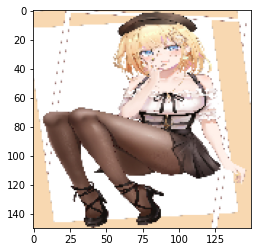

File  : 881bb8603f59a0cc34fafd865a1110201967b5ac.jpg
Name  : ame
[[1. 0. 0. 0. 0.]]


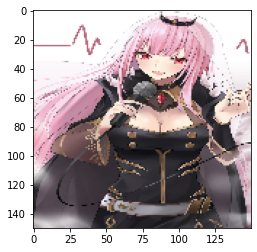

File  : sample_5a957aa19a8752c14057a72746cc0c54da840e58.jpg
Name  : mori
[[0. 0. 0. 0. 1.]]


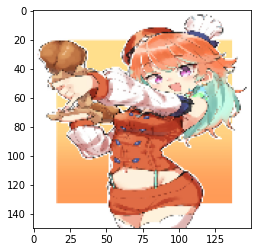

File  : sample_9ef2db5544abbb9fedadc69ede14af155031ed91.jpg
Name  : kiara
[[0. 0. 0. 1. 0.]]


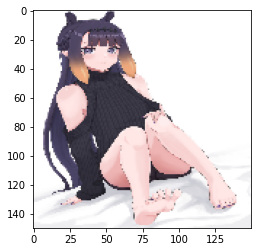

File  : sample_158c25cc17982b868344a3703ae7e149a565739f.jpg
Name  : gura
[[0. 1. 0. 0. 0.]]


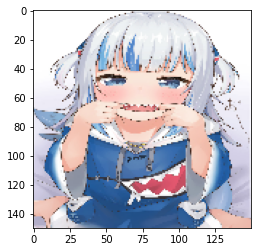

File  : sample_d547fedf49f9f0eec2e4fe25f6fc808feb6df896.jpg
Name  : gura
[[0. 1. 0. 0. 0.]]


In [38]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
 
uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print('==============================================')
  plt.show()
  print("File  :",fn)
  

  largest = 0

  for x in range(0, len(classes[0])):
      if(round(classes[0][x]) > largest):
          largest = x

  if largest==0:
    print("Name  :",'ame')
  elif largest==1:
    print("Name  :",'gura')
  elif largest==2:
    print("Name  :",'ina')
  elif largest==3:
    print("Name  :",'kiara')
  elif largest==4:
    print("Name  :",'mori')

  print(classes)
